#metal analysis#
from baci data, google colab version

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

ore_extraction = pd.read_csv("Ore_Extraction.csv")
refining = pd.read_csv("Refining.csv")
manufacturing = pd.read_csv("Manufacturing.csv")

In [ ]:
metal_hs_map = {
        # "Copper": [740311, 740319, 260300],

    "Gold": [710812, 261690],
    "Silver": [710691],
    "Tin": [800110, 260900],
    "Tantalum": [810330, 261590],
    "Tungsten": [810110, 261100],
    "Cobalt": [810520, 260500],
    "Lithium": [283691, 253090],
    "Nickel": [750210, 260400],
    "Rare Earths (REEs)": [280530, 280590, 284610, 284690],
    "Aluminum": [760110, 260600],
    "Lead": [780110, 260700],
    "Zinc": [790111, 260800],
    "Indium": [811292],
    "Gallium": [811292],
    "Germanium": [811292],
    "Antimony": [811010, 261710],
    "Graphite": [250410]
}


In [ ]:
dfs = {
    "Ore Extraction": ore_extraction,
    "Refining": refining,
    "Manufacturing": manufacturing,
}

\n=== Metal: Gold ===
--- Ore Extraction ---


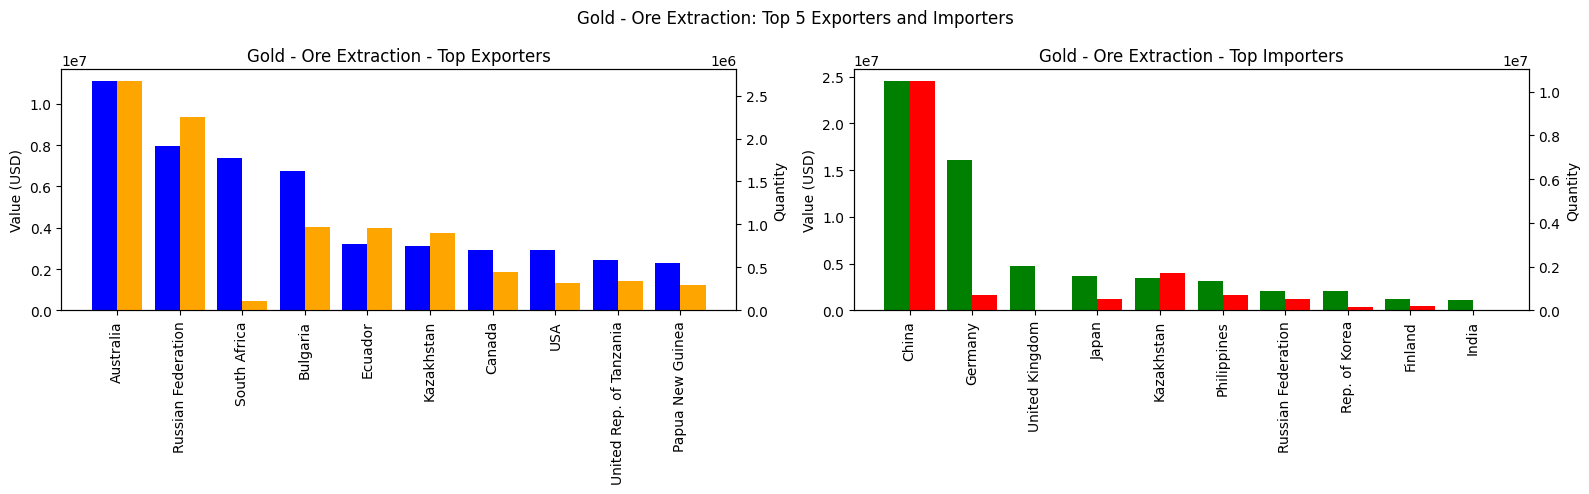

--- Refining ---


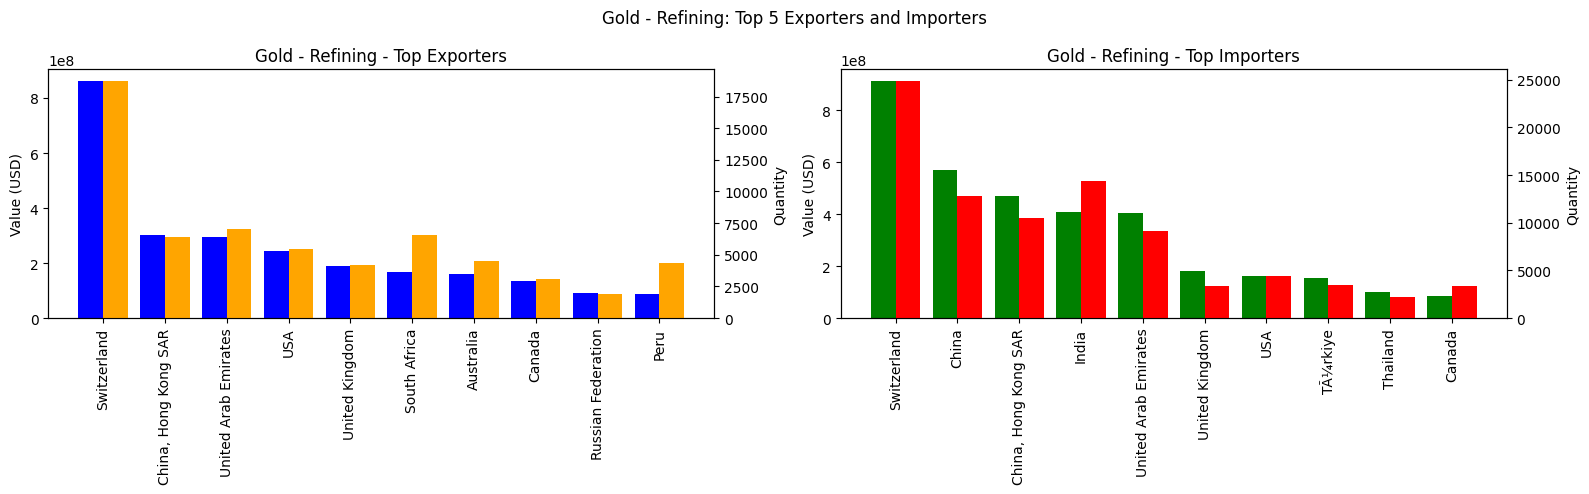

--- Manufacturing ---
No data for Gold in Manufacturing
\n=== Metal: Silver ===
--- Ore Extraction ---
No data for Silver in Ore Extraction
--- Refining ---


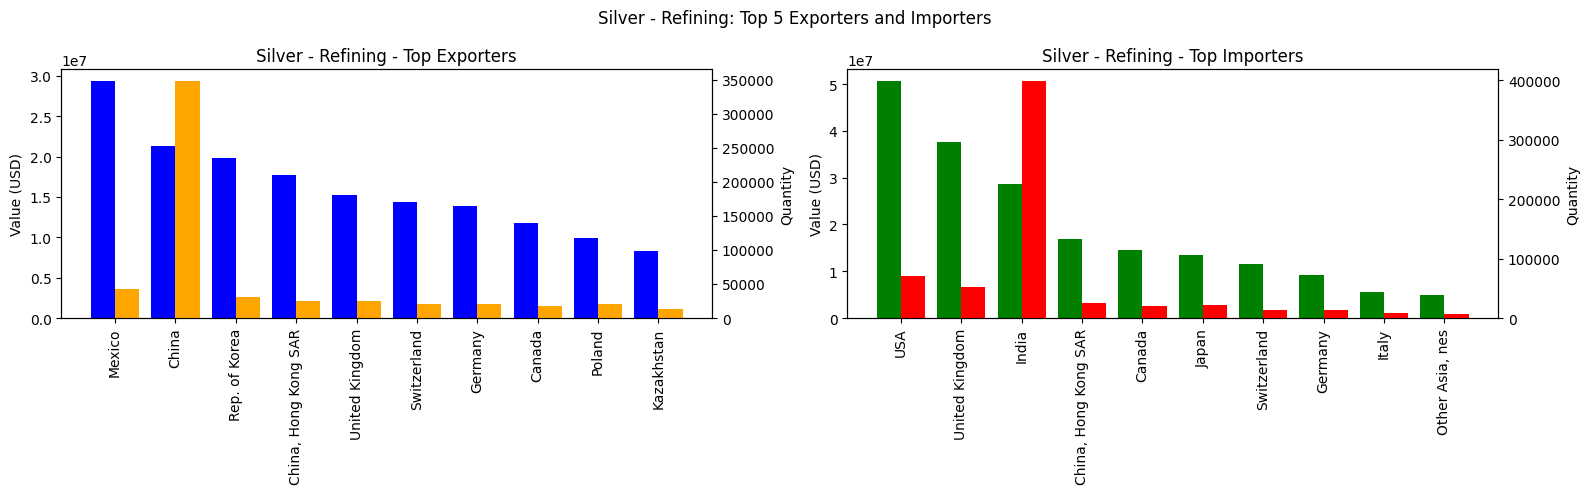

--- Manufacturing ---
No data for Silver in Manufacturing
\n=== Metal: Tin ===
--- Ore Extraction ---


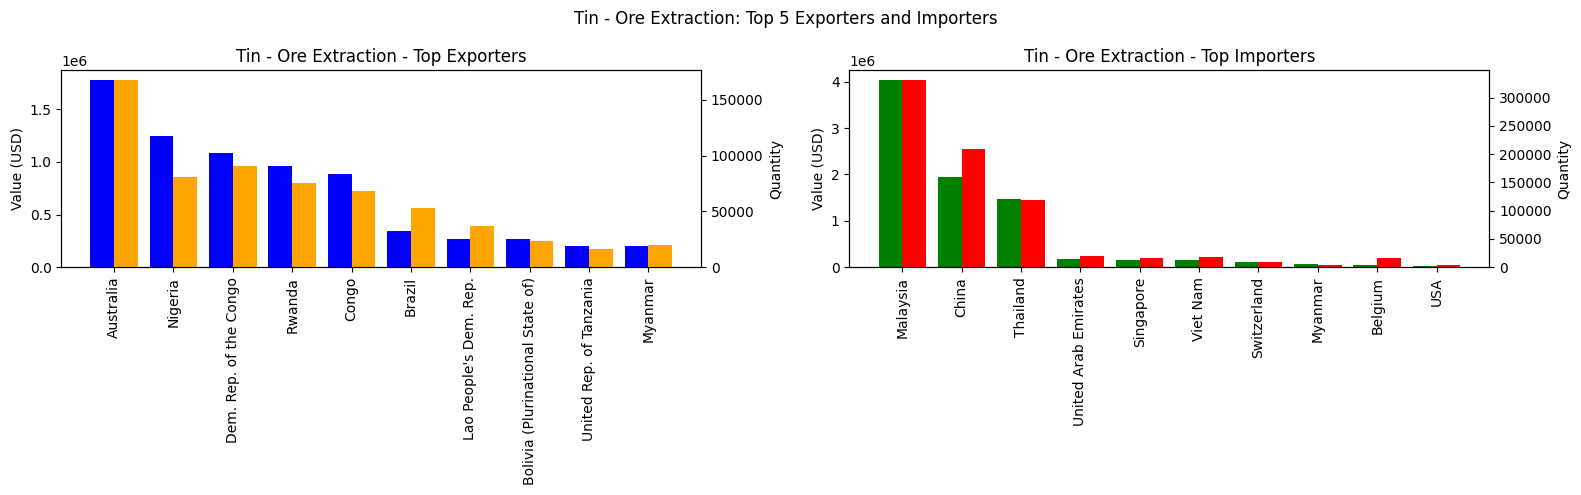

--- Refining ---


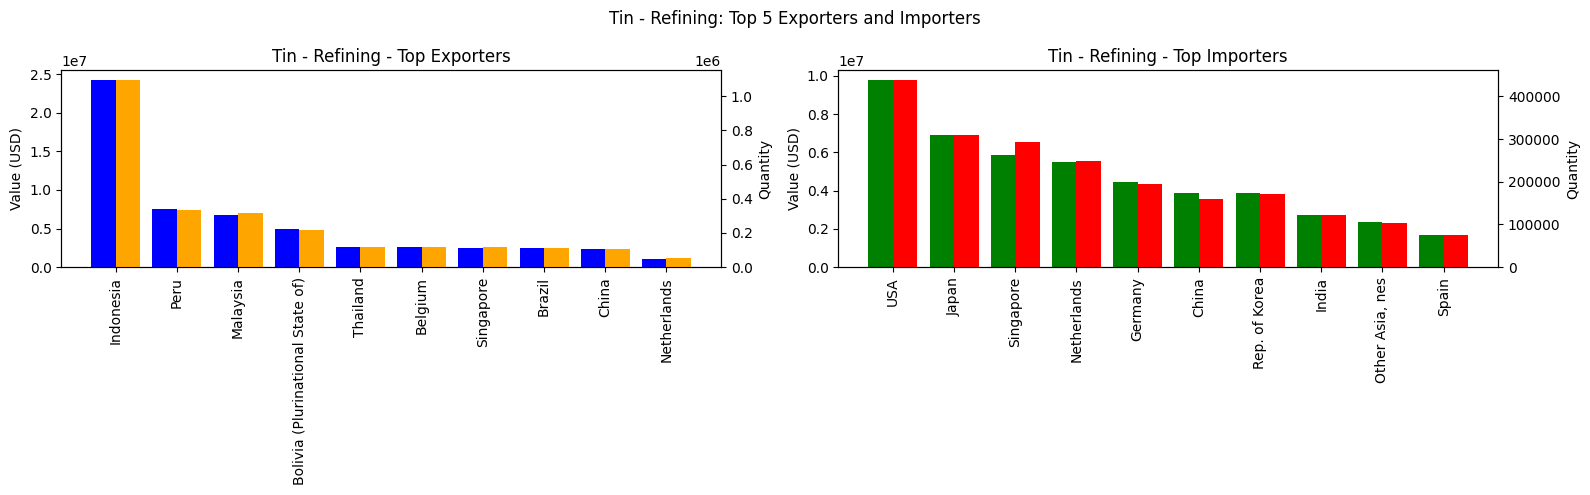

--- Manufacturing ---
No data for Tin in Manufacturing
\n=== Metal: Tantalum ===
--- Ore Extraction ---


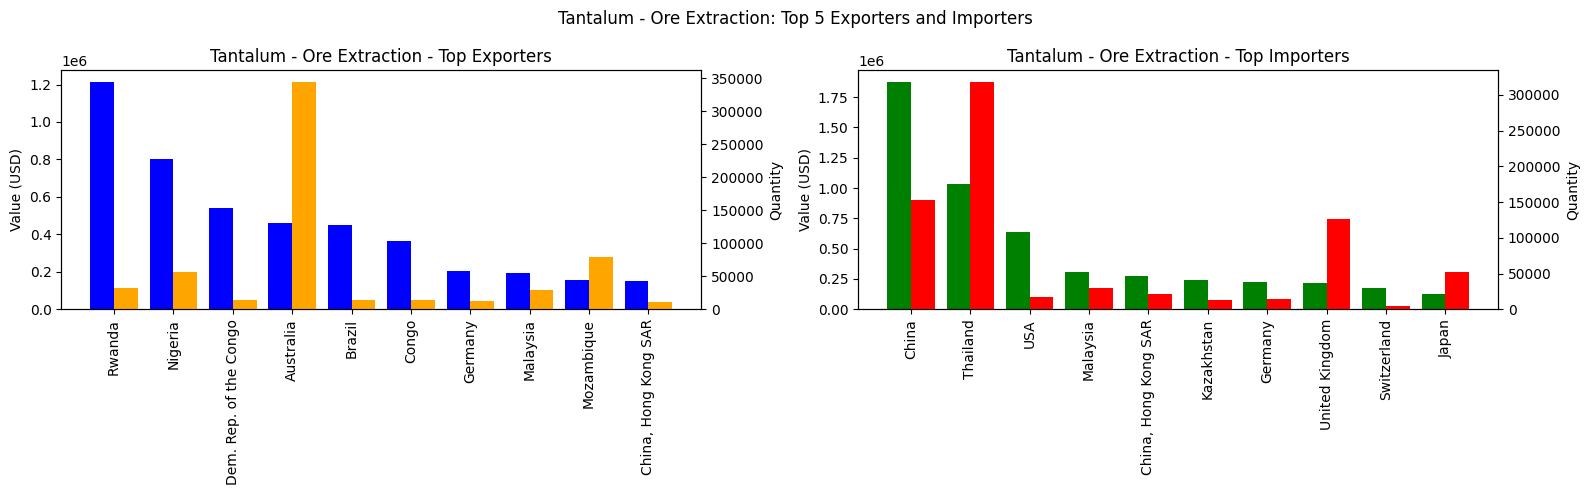

--- Refining ---


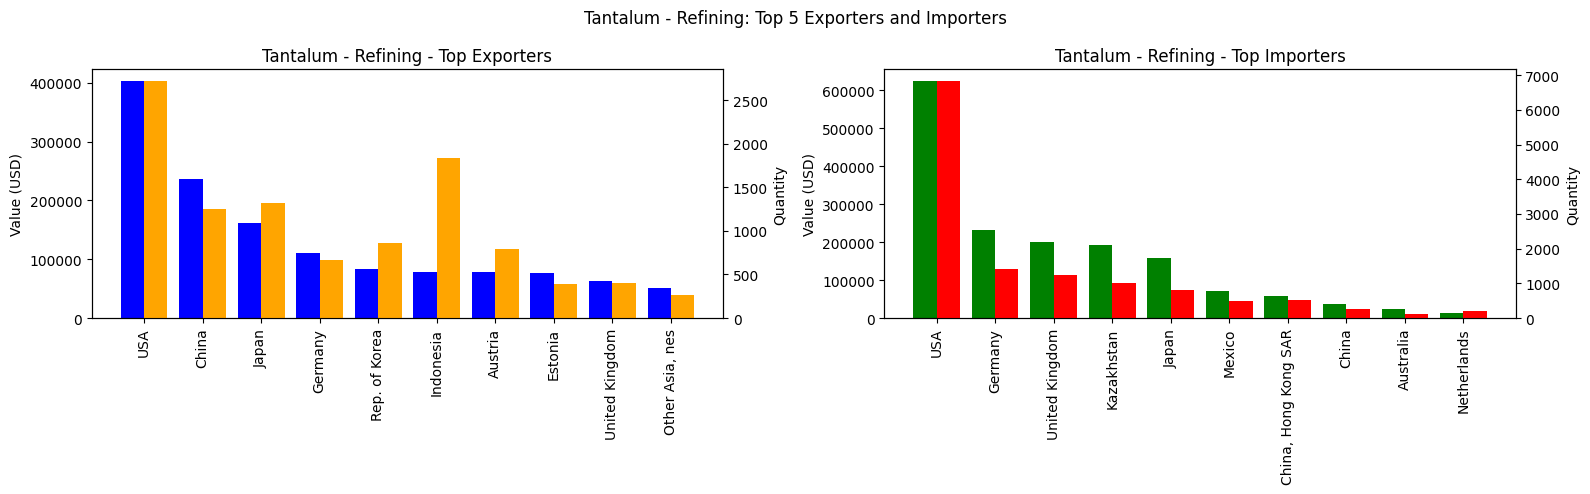

--- Manufacturing ---
No data for Tantalum in Manufacturing
\n=== Metal: Tungsten ===
--- Ore Extraction ---
No data for Tungsten in Ore Extraction
--- Refining ---
No data for Tungsten in Refining
--- Manufacturing ---
No data for Tungsten in Manufacturing
\n=== Metal: Cobalt ===
--- Ore Extraction ---


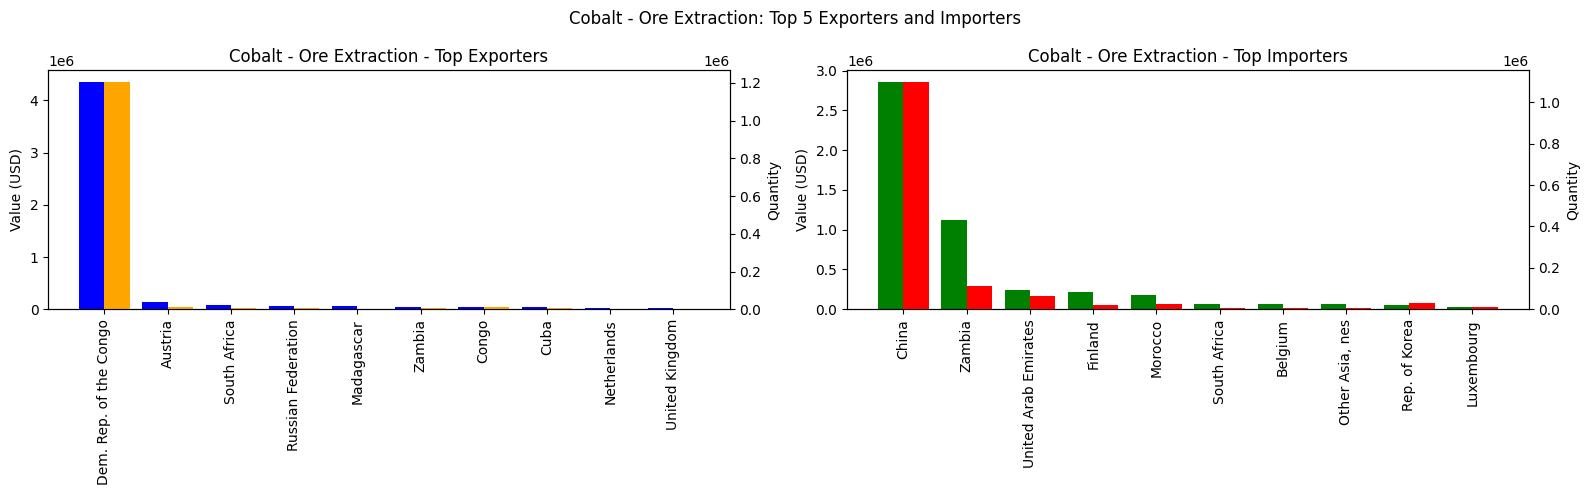

--- Refining ---


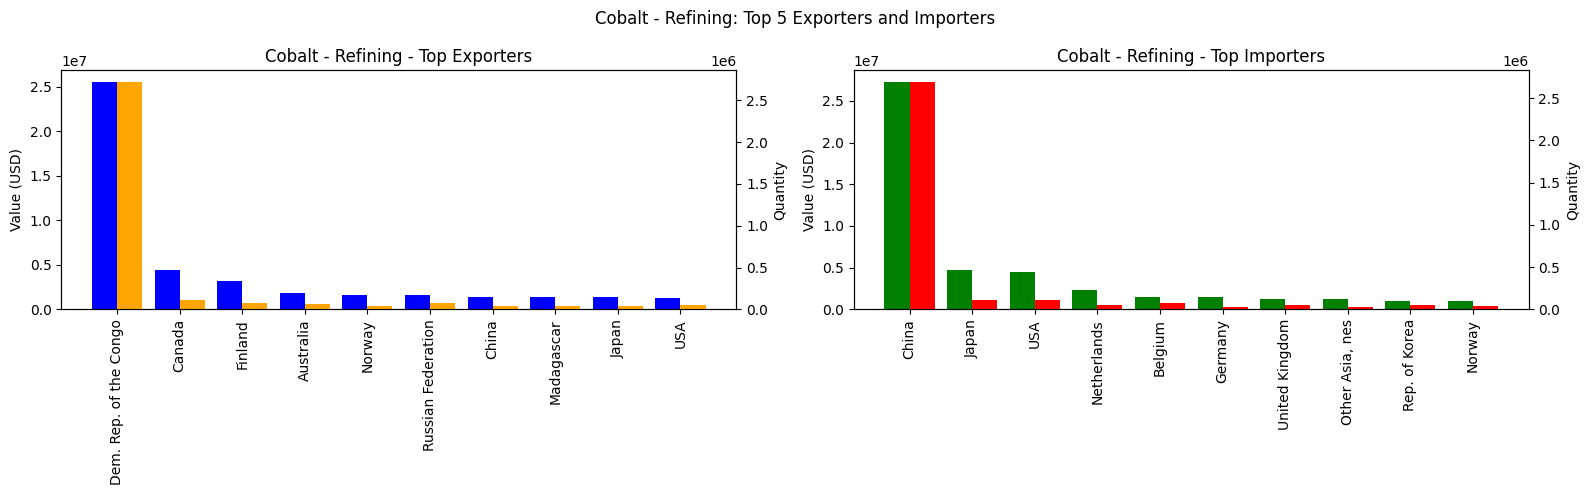

--- Manufacturing ---
No data for Cobalt in Manufacturing
\n=== Metal: Lithium ===
--- Ore Extraction ---


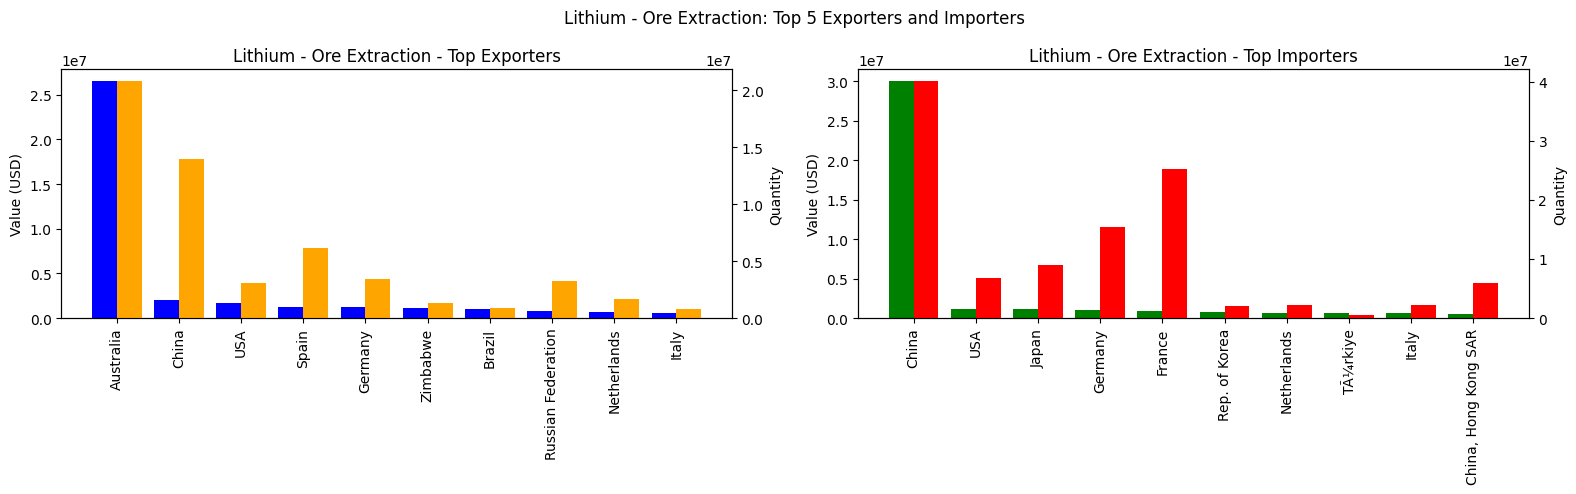

--- Refining ---


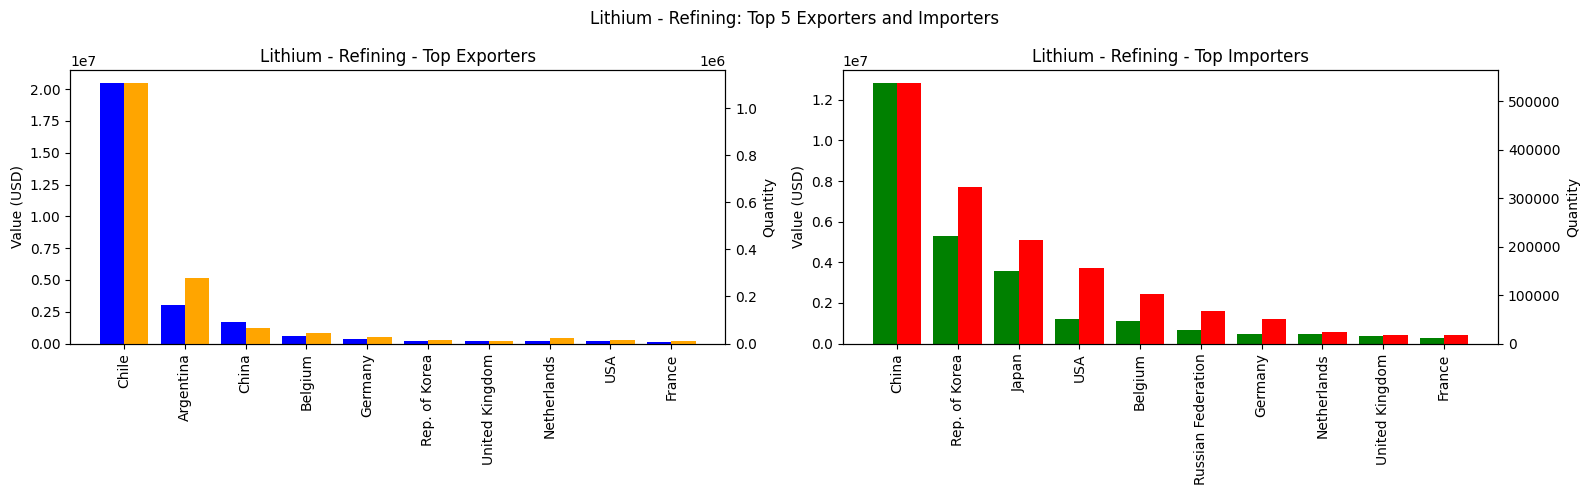

--- Manufacturing ---
No data for Lithium in Manufacturing
\n=== Metal: Nickel ===
--- Ore Extraction ---


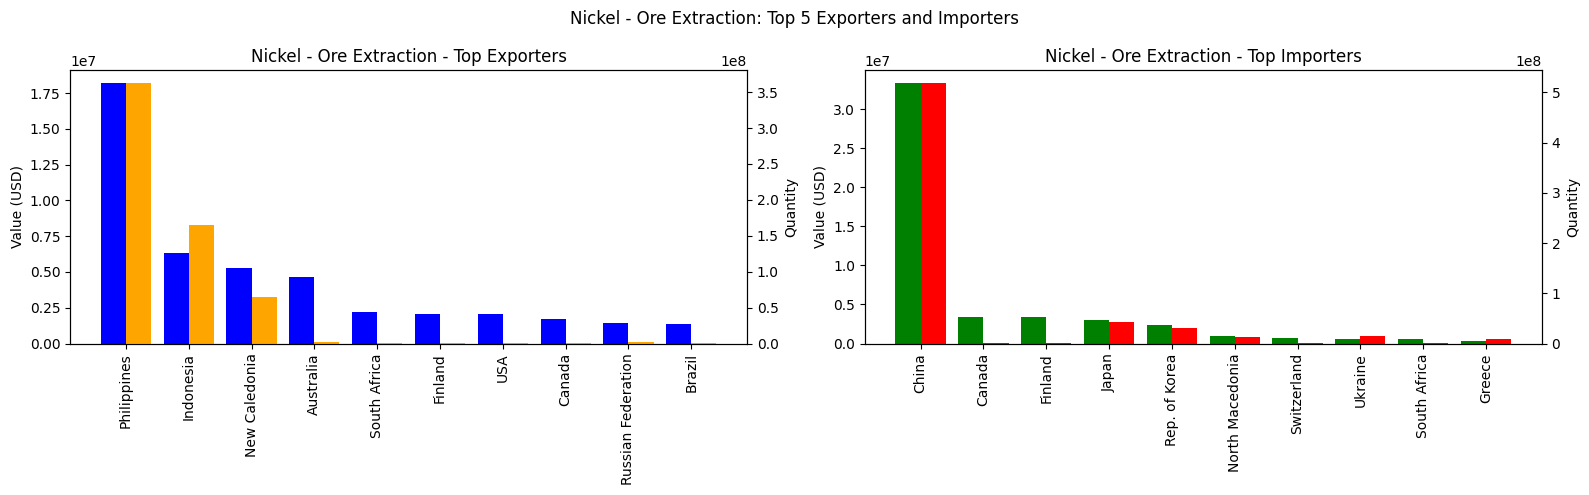

--- Refining ---


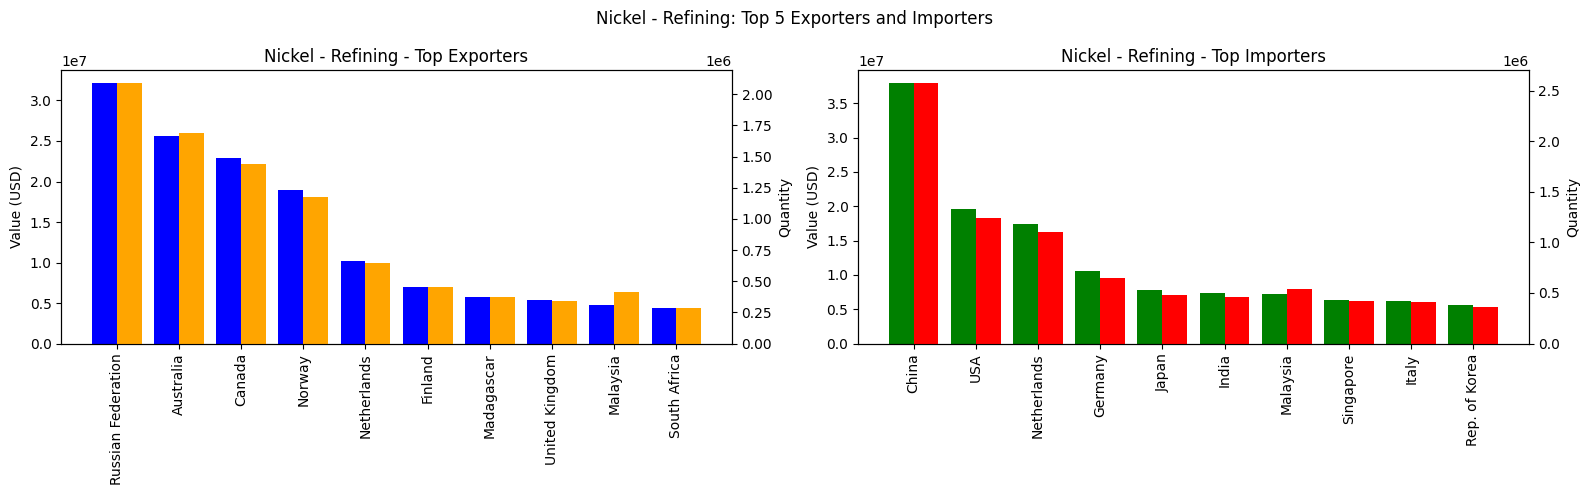

--- Manufacturing ---
No data for Nickel in Manufacturing
\n=== Metal: Rare Earths (REEs) ===
--- Ore Extraction ---
No data for Rare Earths (REEs) in Ore Extraction
--- Refining ---


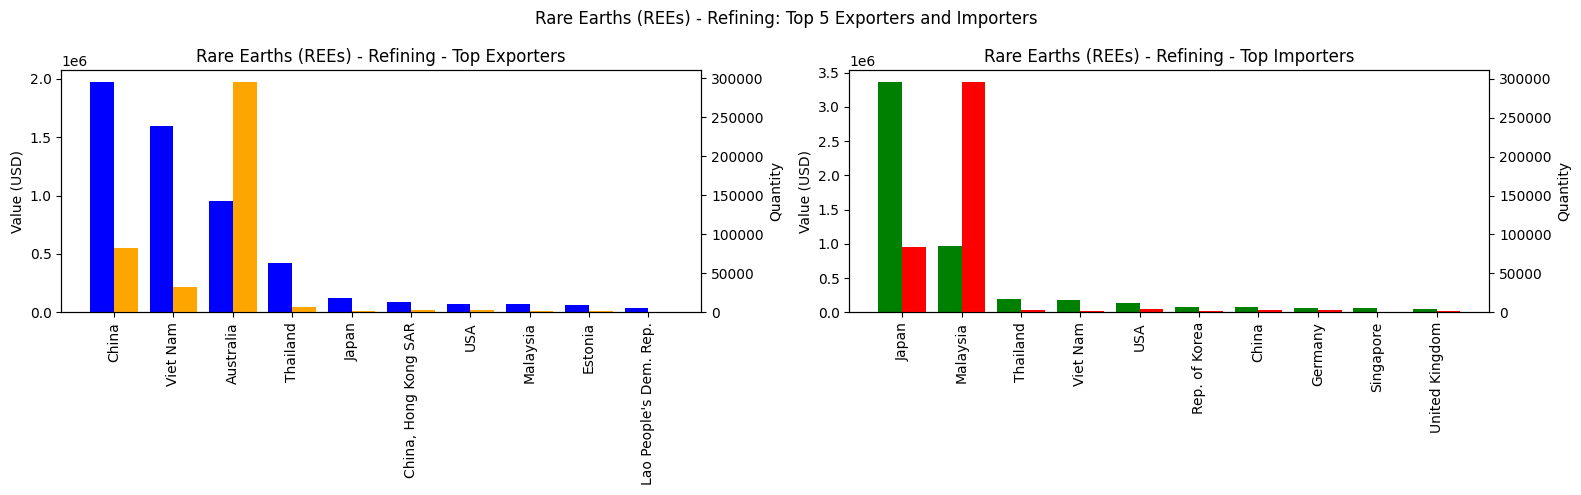

--- Manufacturing ---
No data for Rare Earths (REEs) in Manufacturing
\n=== Metal: Aluminum ===
--- Ore Extraction ---


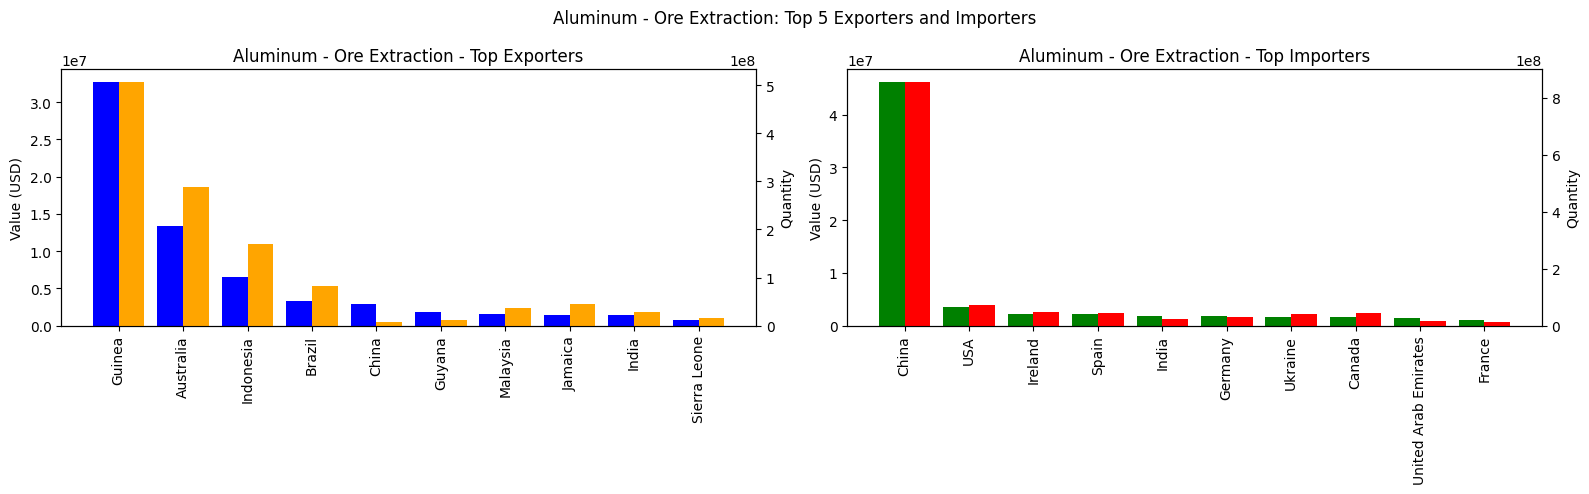

--- Refining ---


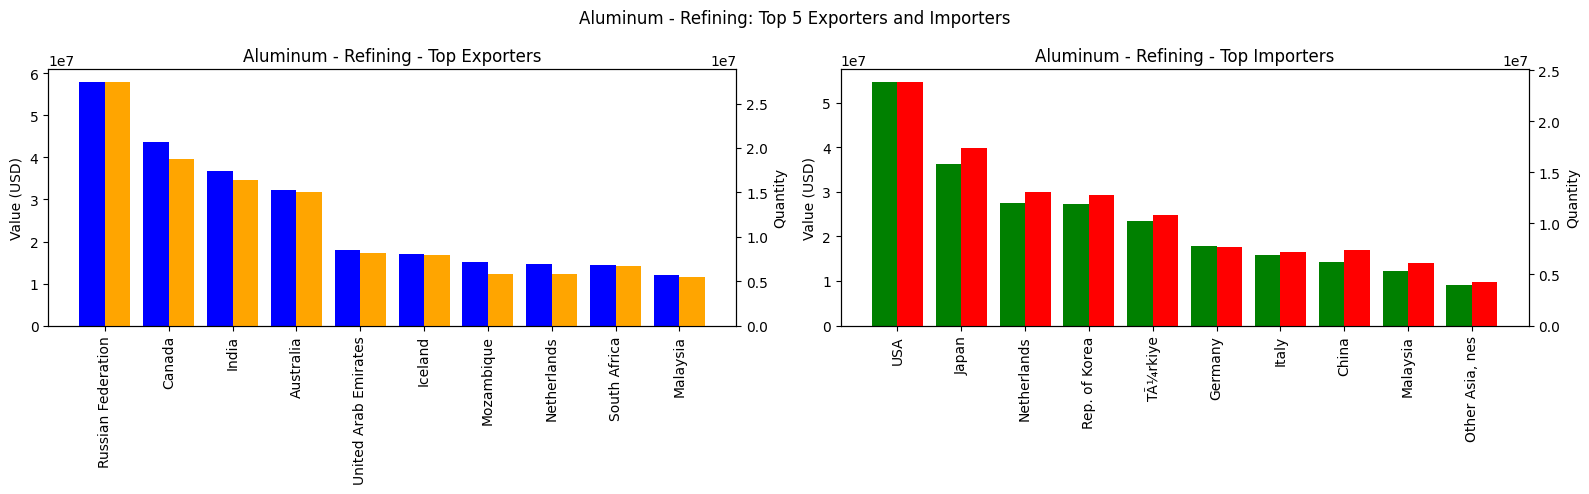

--- Manufacturing ---
No data for Aluminum in Manufacturing
\n=== Metal: Lead ===
--- Ore Extraction ---
No data for Lead in Ore Extraction
--- Refining ---
No data for Lead in Refining
--- Manufacturing ---
No data for Lead in Manufacturing
\n=== Metal: Zinc ===
--- Ore Extraction ---
No data for Zinc in Ore Extraction
--- Refining ---
No data for Zinc in Refining
--- Manufacturing ---
No data for Zinc in Manufacturing
\n=== Metal: Indium ===
--- Ore Extraction ---
No data for Indium in Ore Extraction
--- Refining ---
No data for Indium in Refining
--- Manufacturing ---
No data for Indium in Manufacturing
\n=== Metal: Gallium ===
--- Ore Extraction ---
No data for Gallium in Ore Extraction
--- Refining ---
No data for Gallium in Refining
--- Manufacturing ---
No data for Gallium in Manufacturing
\n=== Metal: Germanium ===
--- Ore Extraction ---
No data for Germanium in Ore Extraction
--- Refining ---
No data for Germanium in Refining
--- Manufacturing ---
No data for Germanium in Manu

In [ ]:
for metal, hs_codes in metal_hs_map.items():
    print(f"\\n=== Metal: {metal} ===")

    filtered_dfs = {stage: df[df["Product"].isin(hs_codes)] for stage, df in dfs.items()}

    for stage, df_stage in filtered_dfs.items():
        print(f"--- {stage} ---")

        if df_stage.empty:
            print(f"No data for {metal} in {stage}")
            continue

        # Exporters
        exporters = df_stage.groupby("Exporter_Name").agg({"Value": "sum", "Quantity": "sum"}).reset_index()
        top_exporters = exporters.nlargest(10, "Value")

        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5), sharey=False)

        exporters = df_stage.groupby("Exporter_Name").agg({"Value": "sum", "Quantity": "sum"}).reset_index()
        top_exporters = exporters.nlargest(10, "Value")
        x1 = range(len(top_exporters))

        ax1_twin = ax1.twinx()
        ax1.bar([p - 0.2 for p in x1], top_exporters["Value"], width=0.4, color='blue', label='Export Value')
        ax1_twin.bar([p + 0.2 for p in x1], top_exporters["Quantity"], width=0.4, color='orange', label='Export Quantity')
        ax1.set_xticks(x1)
        ax1.set_xticklabels(top_exporters["Exporter_Name"], rotation=90)
        ax1.set_title(f"{metal} - {stage} - Top Exporters")
        ax1.set_ylabel("Value (USD)")
        ax1_twin.set_ylabel("Quantity")

        importers = df_stage.groupby("Importer_Name").agg({"Value": "sum", "Quantity": "sum"}).reset_index()
        top_importers = importers.nlargest(10, "Value")
        x2 = range(len(top_importers))

        ax2_twin = ax2.twinx()
        ax2.bar([p - 0.2 for p in x2], top_importers["Value"], width=0.4, color='green', label='Import Value')
        ax2_twin.bar([p + 0.2 for p in x2], top_importers["Quantity"], width=0.4, color='red', label='Import Quantity')
        ax2.set_xticks(x2)
        ax2.set_xticklabels(top_importers["Importer_Name"], rotation=90)
        ax2.set_title(f"{metal} - {stage} - Top Importers")
        ax2.set_ylabel("Value (USD)")
        ax2_twin.set_ylabel("Quantity")

        plt.suptitle(f"{metal} - {stage}: Top 5 Exporters and Importers")
        plt.tight_layout()
        plt.show()



=== Combined Plot for Stage: Ore Extraction ===


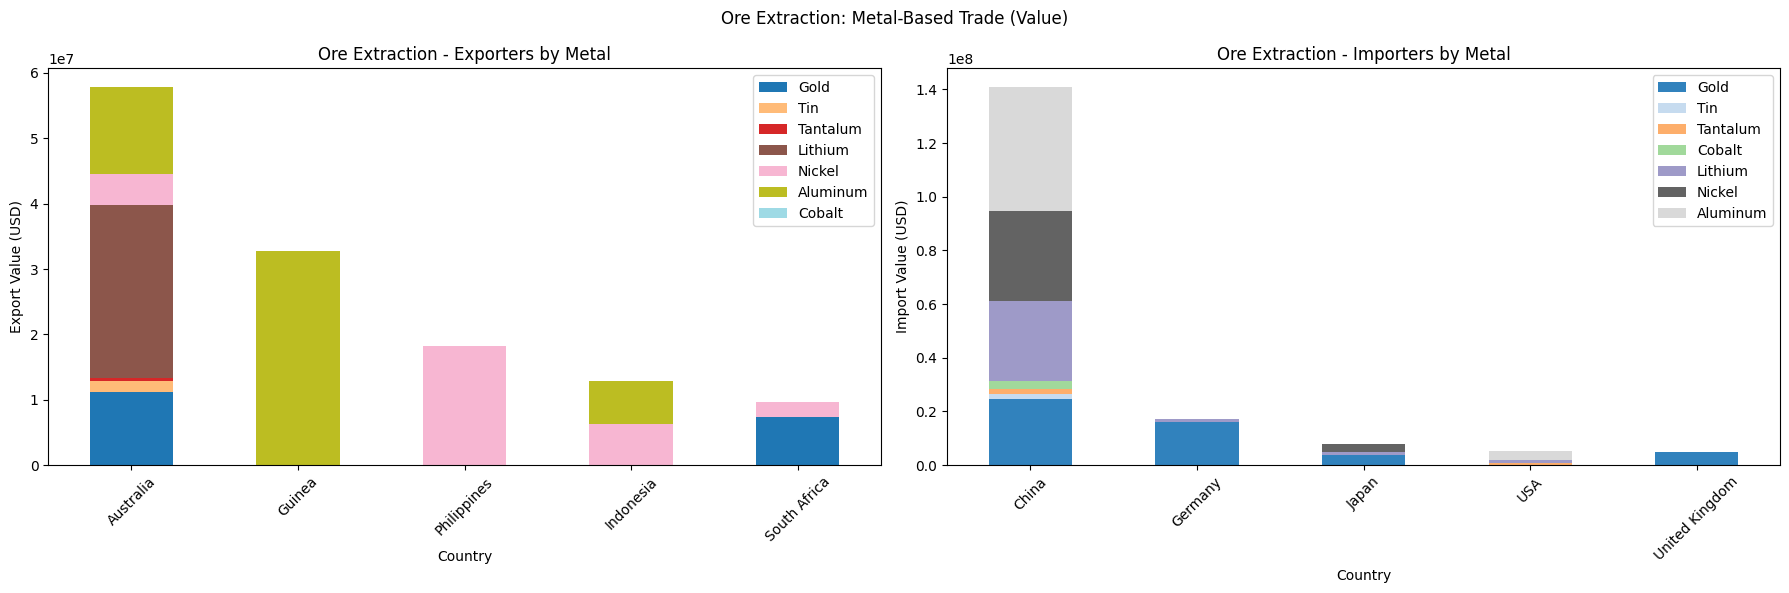


=== Combined Plot for Stage: Refining ===


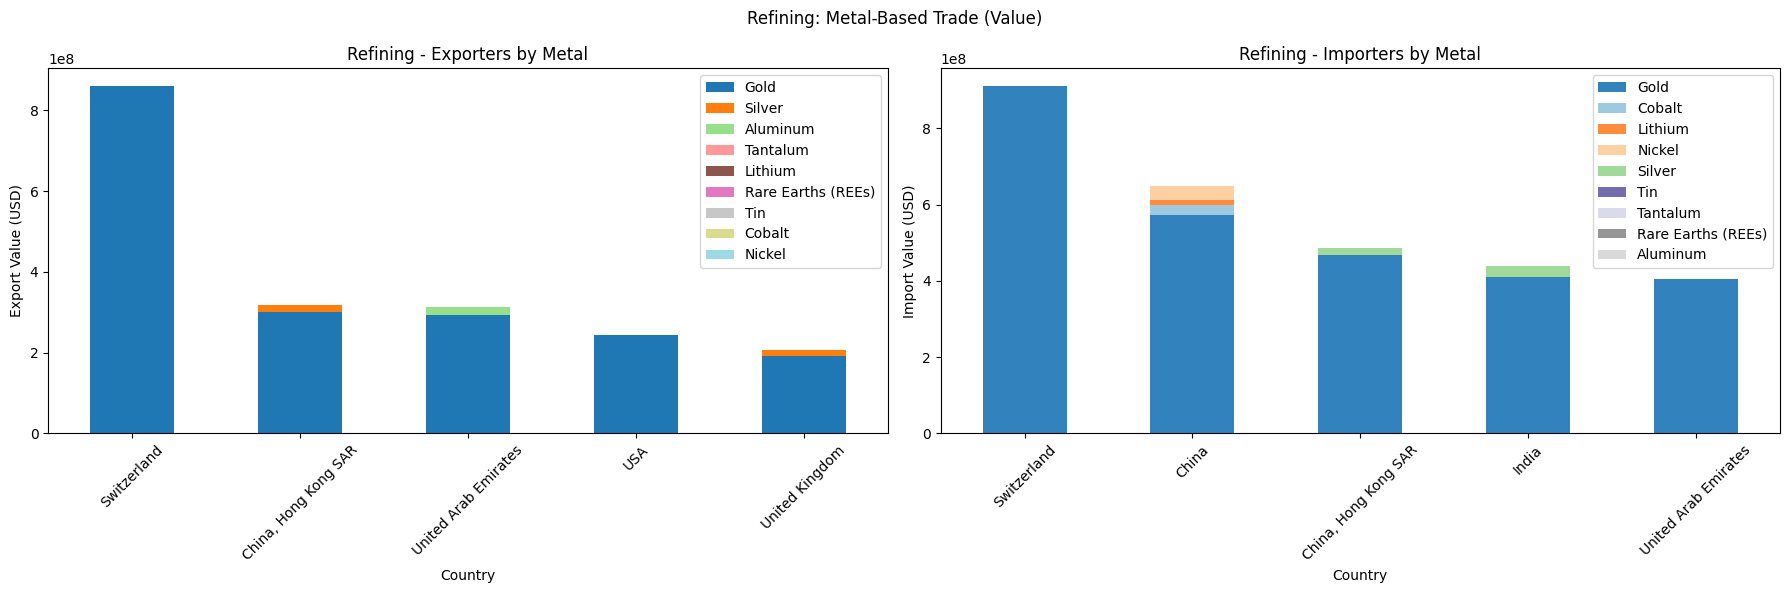


=== Combined Plot for Stage: Manufacturing ===
No numeric export/import data available for Manufacturing


In [ ]:
from collections import defaultdict

for stage, df_stage in dfs.items():
    print(f"\n=== Combined Plot for Stage: {stage} ===")

    exporter_data = defaultdict(dict)
    importer_data = defaultdict(dict)

    for metal, hs_codes in metal_hs_map.items():
        metal_df = df_stage[df_stage["Product"].isin(hs_codes)]

        if metal_df.empty:
            continue

        # Export values
        metal_exports = metal_df.groupby("Exporter_Name")["Value"].sum().nlargest(5)
        for country, val in metal_exports.items():
            exporter_data[country][metal] = val

        # Import values
        metal_imports = metal_df.groupby("Importer_Name")["Value"].sum().nlargest(5)
        for country, val in metal_imports.items():
            importer_data[country][metal] = val

    # Build clean DataFrames
    exporter_df = pd.DataFrame(exporter_data).fillna(0).T
    importer_df = pd.DataFrame(importer_data).fillna(0).T

    # Ensure numeric-only and strip invalid rows
    exporter_df = exporter_df.apply(pd.to_numeric, errors='coerce').fillna(0)
    importer_df = importer_df.apply(pd.to_numeric, errors='coerce').fillna(0)

    if exporter_df.empty and importer_df.empty:
        print(f"No numeric export/import data available for {stage}")
        continue

    # Keep only top 5 countries
    if not exporter_df.empty:
        exporter_df = exporter_df.loc[exporter_df.sum(axis=1).nlargest(5).index]
    if not importer_df.empty:
        importer_df = importer_df.loc[importer_df.sum(axis=1).nlargest(5).index]

    # Plot side-by-side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

    if not exporter_df.empty:
        exporter_df.plot(kind="bar", stacked=True, ax=ax1, colormap="tab20")
        ax1.set_title(f"{stage} - Exporters by Metal")
        ax1.set_ylabel("Export Value (USD)")
        ax1.set_xlabel("Country")
        ax1.set_xticklabels(exporter_df.index, rotation=45)

    if not importer_df.empty:
        importer_df.plot(kind="bar", stacked=True, ax=ax2, colormap="tab20c")
        ax2.set_title(f"{stage} - Importers by Metal")
        ax2.set_ylabel("Import Value (USD)")
        ax2.set_xlabel("Country")
        ax2.set_xticklabels(importer_df.index, rotation=45)

    plt.suptitle(f"{stage}: Metal-Based Trade (Value)")
    plt.tight_layout()
    plt.show()


Quantity Plot for Stage: Ore Extraction


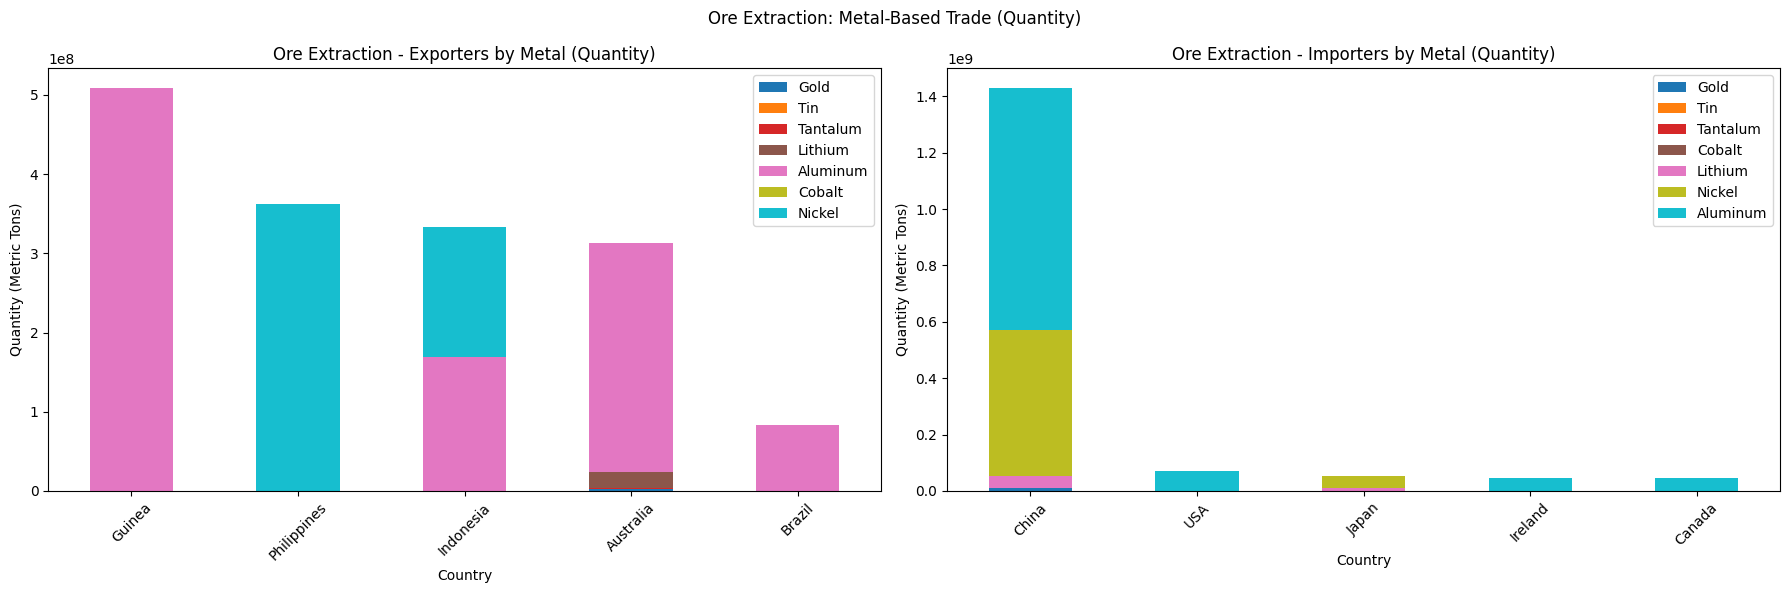

Quantity Plot for Stage: Refining


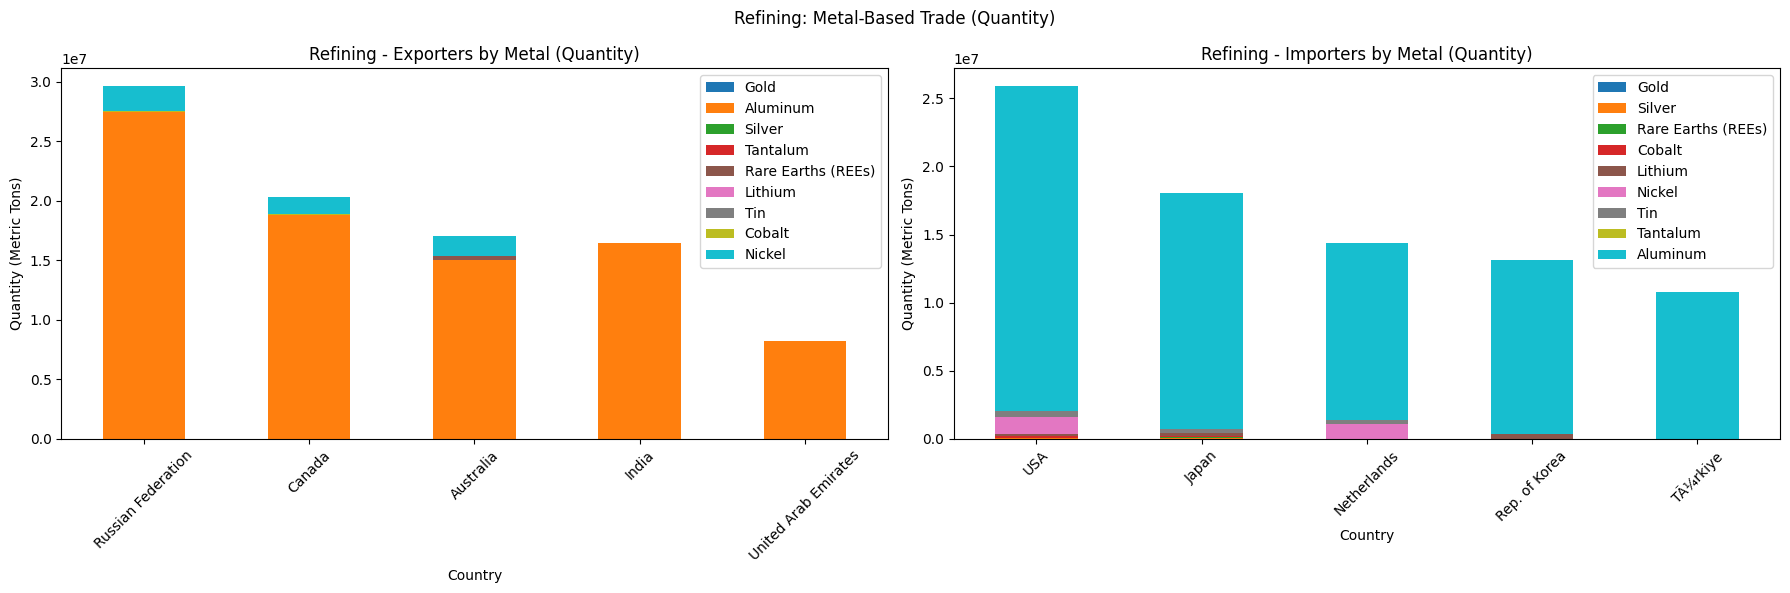

Quantity Plot for Stage: Manufacturing
No quantity data available for Manufacturing


In [ ]:
from collections import defaultdict

for stage, df_stage in dfs.items():
    print(f"Quantity Plot for Stage: {stage}")

    exporter_data = defaultdict(dict)
    importer_data = defaultdict(dict)

    for metal, hs_codes in metal_hs_map.items():
        metal_df = df_stage[df_stage["Product"].isin(hs_codes)]

        if metal_df.empty:
            continue

        # Export quantities
        metal_exports = metal_df.groupby("Exporter_Name")["Quantity"].sum().nlargest(5)
        for country, val in metal_exports.items():
            exporter_data[country][metal] = val

        # Import quantities
        metal_imports = metal_df.groupby("Importer_Name")["Quantity"].sum().nlargest(5)
        for country, val in metal_imports.items():
            importer_data[country][metal] = val

    exporter_df = pd.DataFrame(exporter_data).fillna(0).T
    importer_df = pd.DataFrame(importer_data).fillna(0).T

    exporter_df = exporter_df.apply(pd.to_numeric, errors='coerce').fillna(0)
    importer_df = importer_df.apply(pd.to_numeric, errors='coerce').fillna(0)

    if exporter_df.empty and importer_df.empty:
        print(f"No quantity data available for {stage}")
        continue

    if not exporter_df.empty:
        exporter_df = exporter_df.loc[exporter_df.sum(axis=1).nlargest(5).index]
    if not importer_df.empty:
        importer_df = importer_df.loc[importer_df.sum(axis=1).nlargest(5).index]

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

    if not exporter_df.empty:
        exporter_df.plot(kind="bar", stacked=True, ax=ax1, colormap="tab10")
        ax1.set_title(f"{stage} - Exporters by Metal (Quantity)")
        ax1.set_ylabel("Quantity (Metric Tons)")
        ax1.set_xlabel("Country")
        ax1.set_xticklabels(exporter_df.index, rotation=45)

    if not importer_df.empty:
        importer_df.plot(kind="bar", stacked=True, ax=ax2, colormap="tab10")
        ax2.set_title(f"{stage} - Importers by Metal (Quantity)")
        ax2.set_ylabel("Quantity (Metric Tons)")
        ax2.set_xlabel("Country")
        ax2.set_xticklabels(importer_df.index, rotation=45)

    plt.suptitle(f"{stage}: Metal-Based Trade (Quantity)")
    plt.tight_layout()
    plt.show()



=== Normalized Plot (USD/ton) for Stage: Ore Extraction ===


<ipython-input-16-c8e91e274114>:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-16-c8e91e274114>:23: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-16-c8e91e274114>:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass

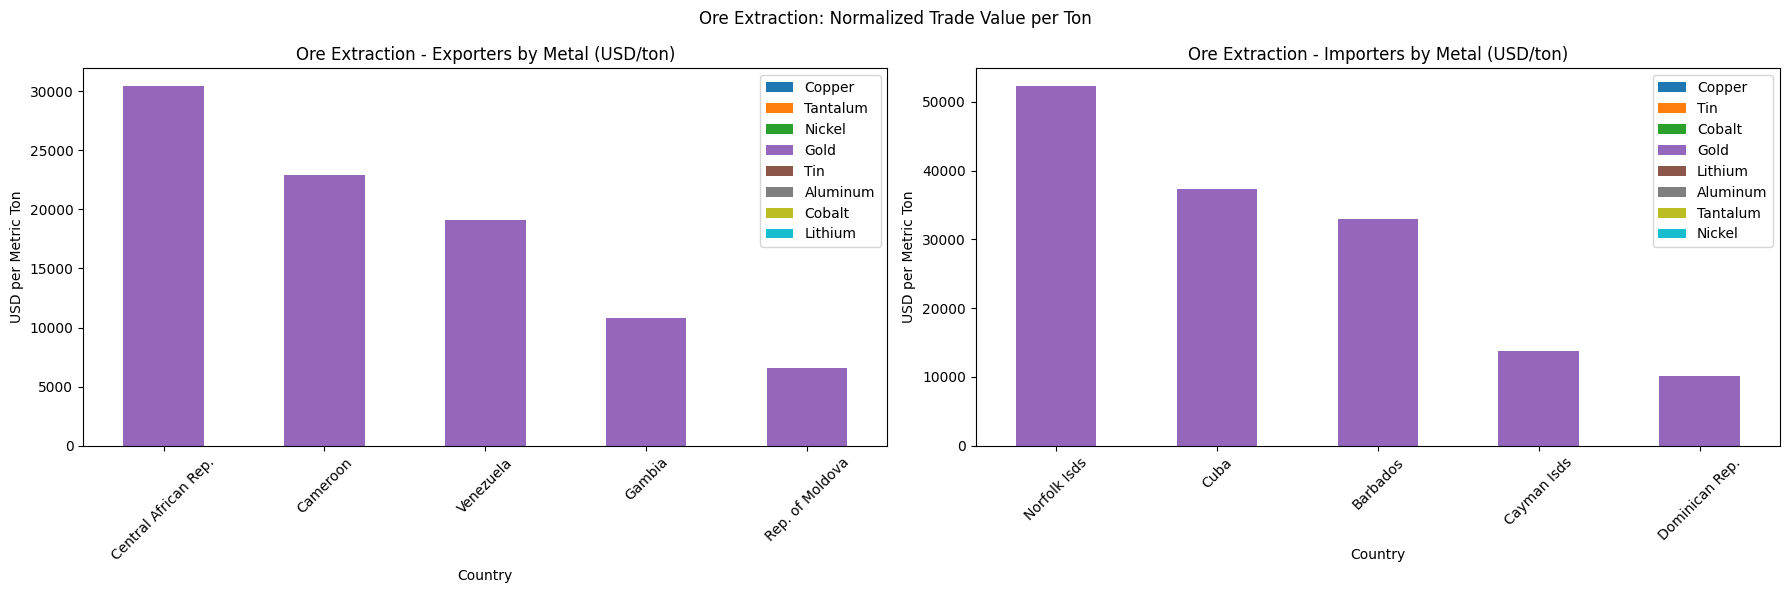


=== Normalized Plot (USD/ton) for Stage: Refining ===


<ipython-input-16-c8e91e274114>:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-16-c8e91e274114>:23: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-16-c8e91e274114>:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass

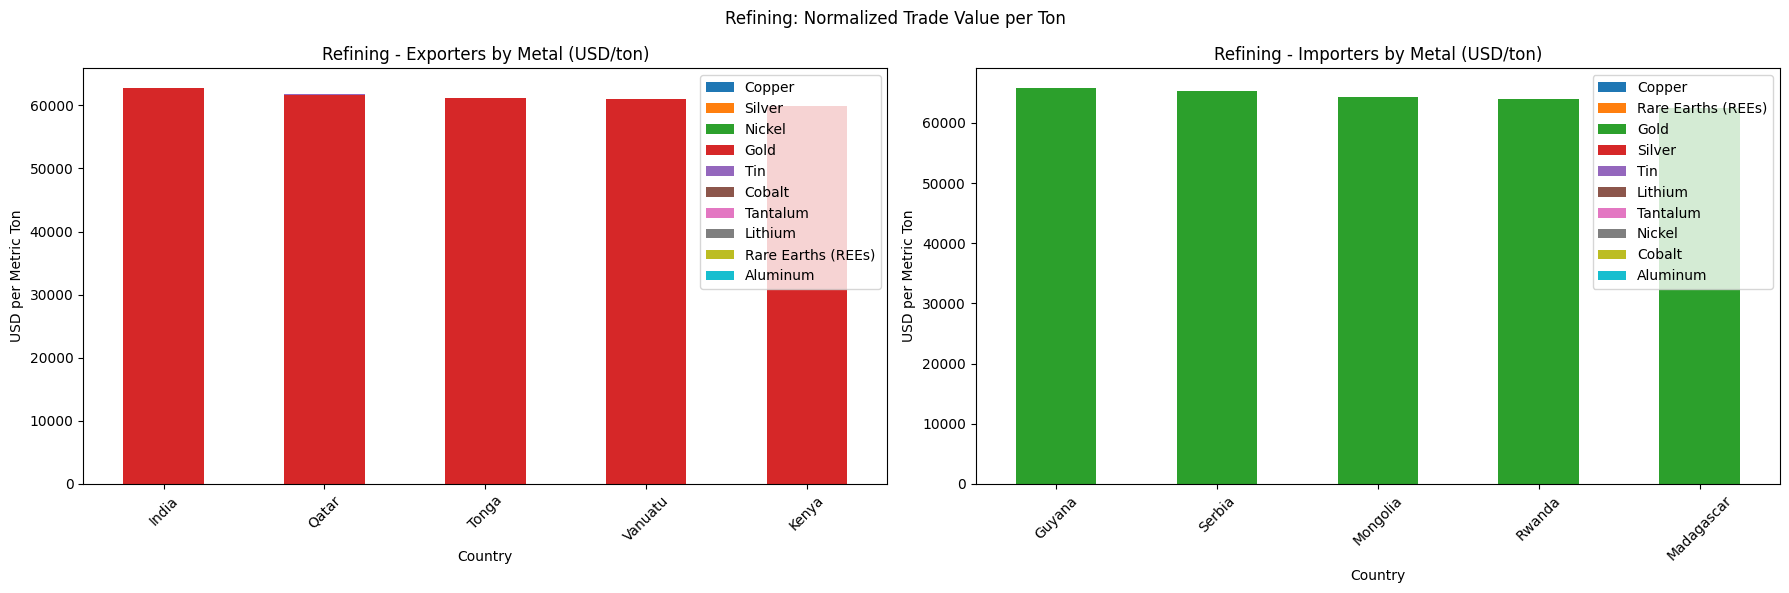


=== Normalized Plot (USD/ton) for Stage: Manufacturing ===
No normalized data available for Manufacturing

=== Normalized Plot (USD/ton) for Stage: Mining ===


<ipython-input-16-c8e91e274114>:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-16-c8e91e274114>:23: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-16-c8e91e274114>:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass

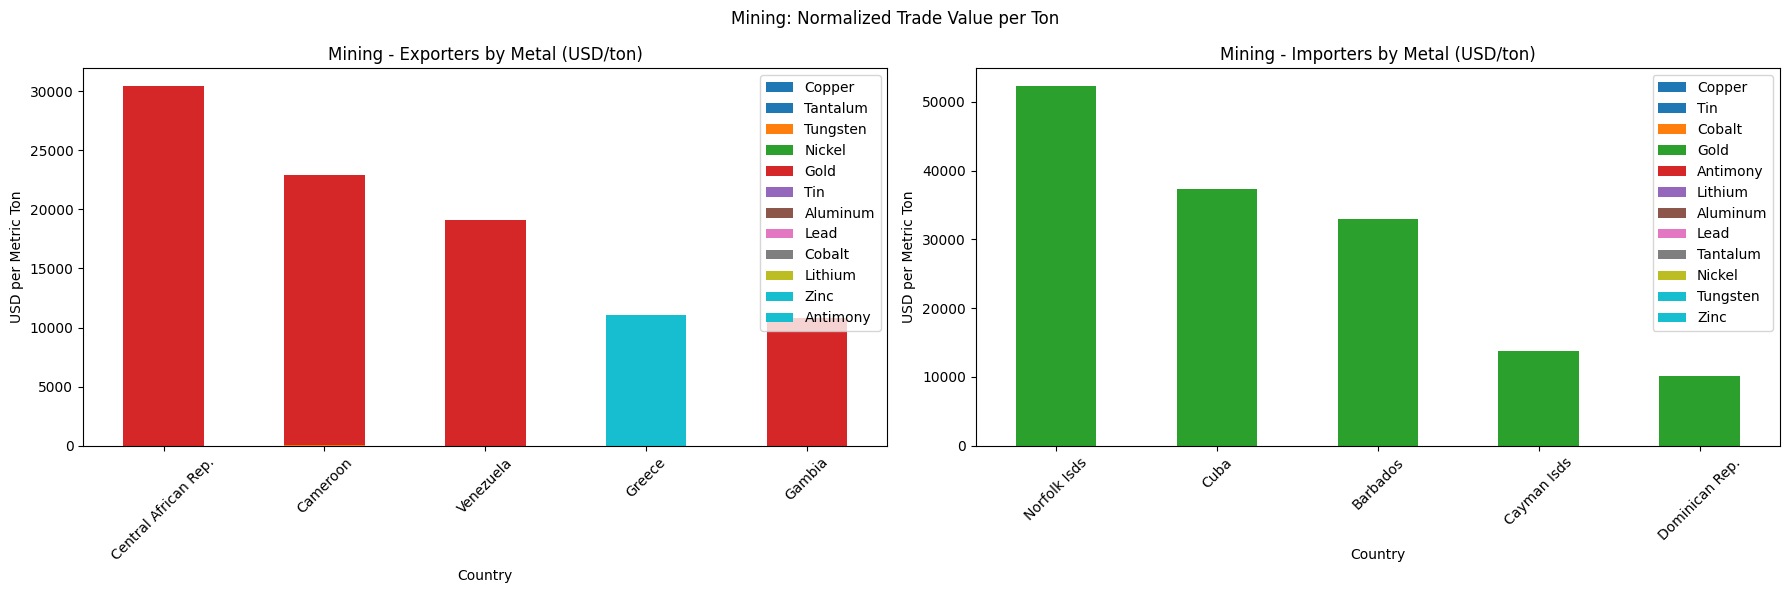

In [ ]:
for stage, df_stage in dfs.items():
    print(f"Normalized Plot (USD/ton) for Stage: {stage}")

    exporter_data = defaultdict(dict)
    importer_data = defaultdict(dict)

    for metal, hs_codes in metal_hs_map.items():
        metal_df = df_stage[df_stage["Product"].isin(hs_codes)]
        metal_df = metal_df[metal_df["Quantity"] > 0]  # avoid division by zero

        if metal_df.empty:
            continue

        # Normalized export value
        metal_exports = metal_df.groupby("Exporter_Name").apply(
            lambda g: g["Value"].sum() / g["Quantity"].sum()
        ).nlargest(5)

        for country, val in metal_exports.items():
            exporter_data[country][metal] = val

        # Normalized import value
        metal_imports = metal_df.groupby("Importer_Name").apply(
            lambda g: g["Value"].sum() / g["Quantity"].sum()
        ).nlargest(5)

        for country, val in metal_imports.items():
            importer_data[country][metal] = val

    exporter_df = pd.DataFrame(exporter_data).fillna(0).T
    importer_df = pd.DataFrame(importer_data).fillna(0).T

    exporter_df = exporter_df.apply(pd.to_numeric, errors='coerce').fillna(0)
    importer_df = importer_df.apply(pd.to_numeric, errors='coerce').fillna(0)

    if exporter_df.empty and importer_df.empty:
        print(f"No normalized data available for {stage}")
        continue

    if not exporter_df.empty:
        exporter_df = exporter_df.loc[exporter_df.sum(axis=1).nlargest(5).index]
    if not importer_df.empty:
        importer_df = importer_df.loc[importer_df.sum(axis=1).nlargest(5).index]

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

    if not exporter_df.empty:
        exporter_df.plot(kind="bar", stacked=True, ax=ax1, colormap="tab10")
        ax1.set_title(f"{stage} - Exporters by Metal (USD/ton)")
        ax1.set_ylabel("USD per Metric Ton")
        ax1.set_xlabel("Country")
        ax1.set_xticklabels(exporter_df.index, rotation=45)

    if not importer_df.empty:
        importer_df.plot(kind="bar", stacked=True, ax=ax2, colormap="tab10")
        ax2.set_title(f"{stage} - Importers by Metal (USD/ton)")
        ax2.set_ylabel("USD per Metric Ton")
        ax2.set_xlabel("Country")
        ax2.set_xticklabels(importer_df.index, rotation=45)

    plt.suptitle(f"{stage}: Normalized Trade Value per Ton")
    plt.tight_layout()
    plt.show()


=== Per-Metal Export Profitability and Share (Refining Only) ===

 Copper - Top Exporters (USD per ton & % Global Value)


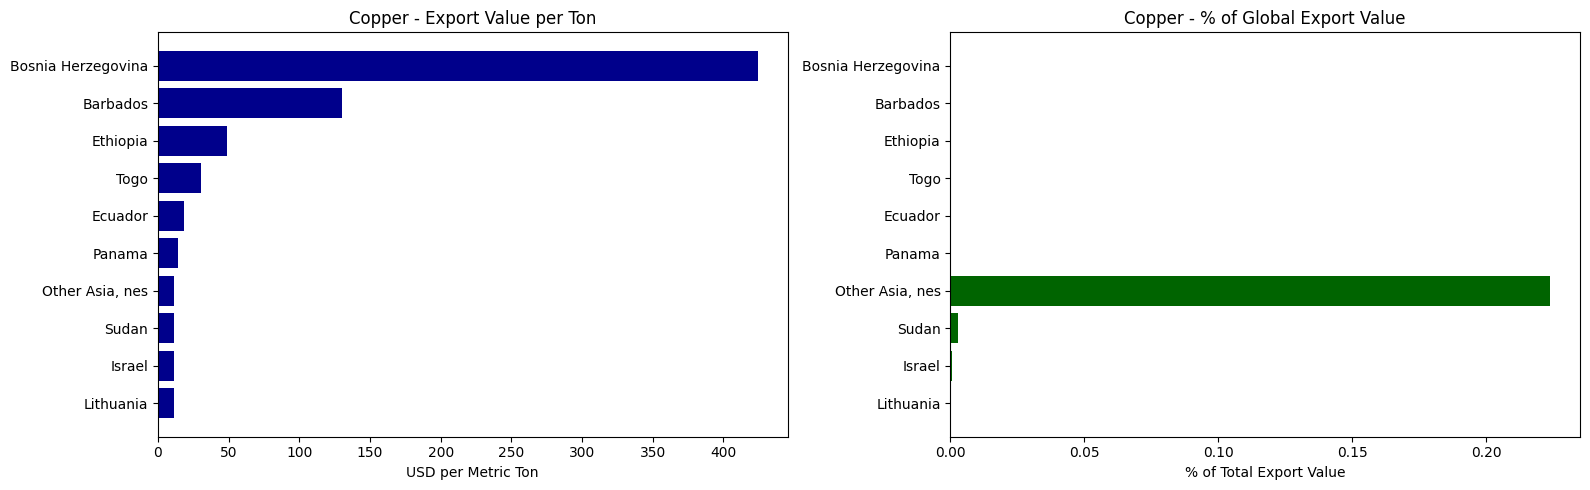


 Gold - Top Exporters (USD per ton & % Global Value)


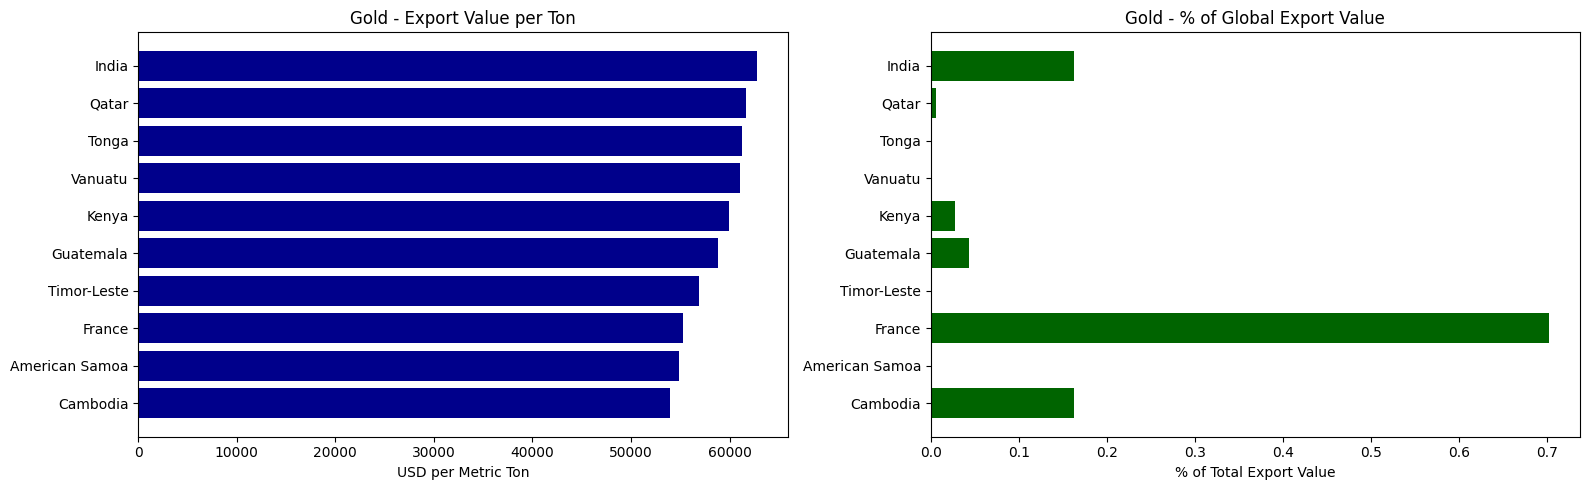


 Silver - Top Exporters (USD per ton & % Global Value)


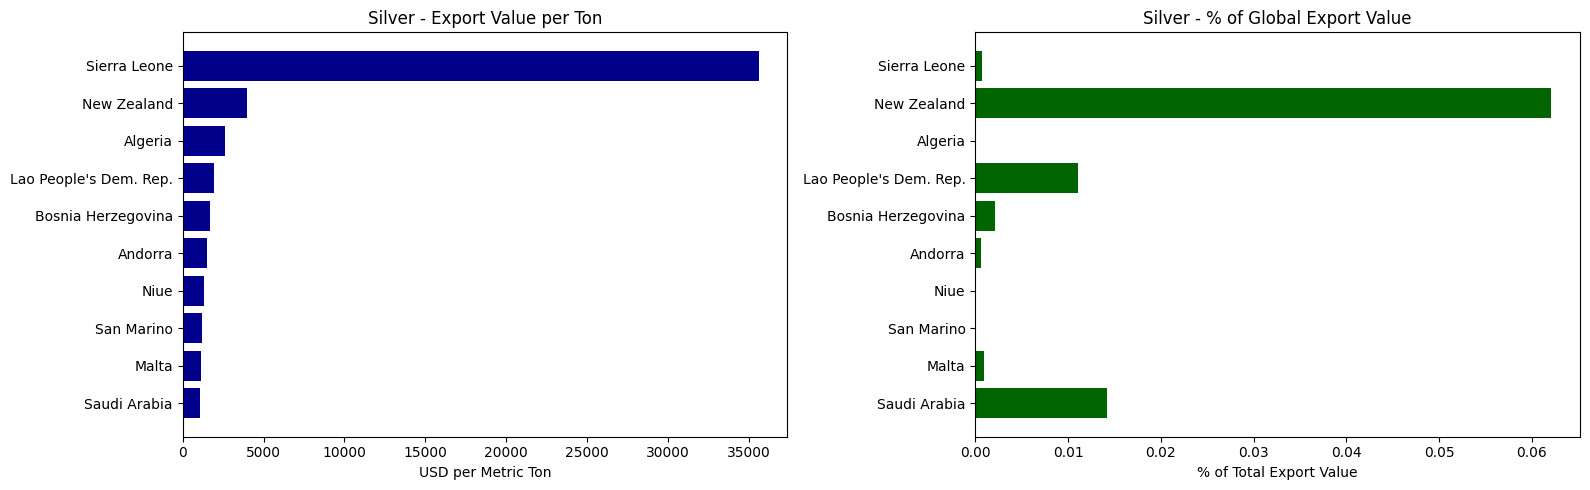


 Tin - Top Exporters (USD per ton & % Global Value)


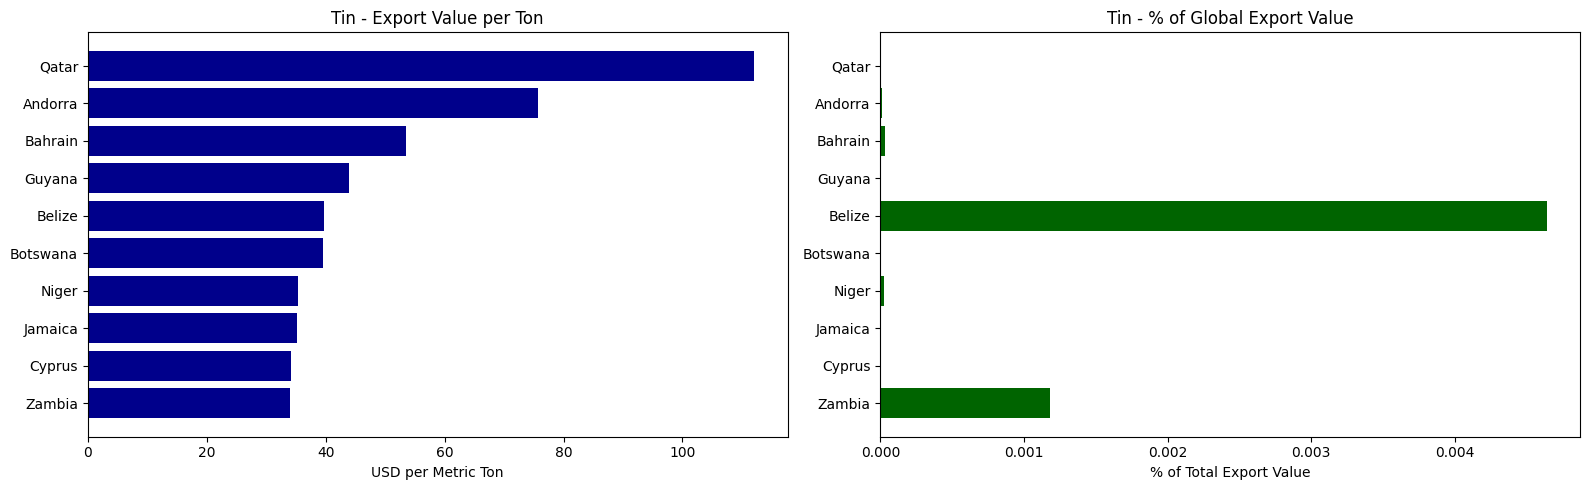


 Tantalum - Top Exporters (USD per ton & % Global Value)


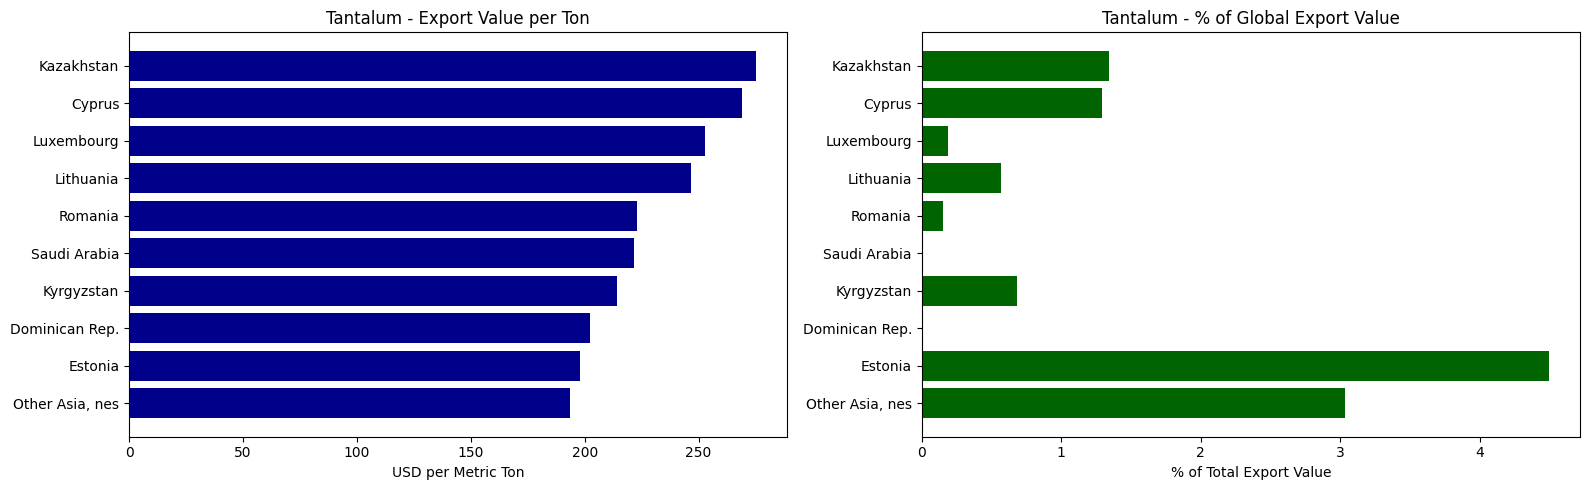


 Cobalt - Top Exporters (USD per ton & % Global Value)


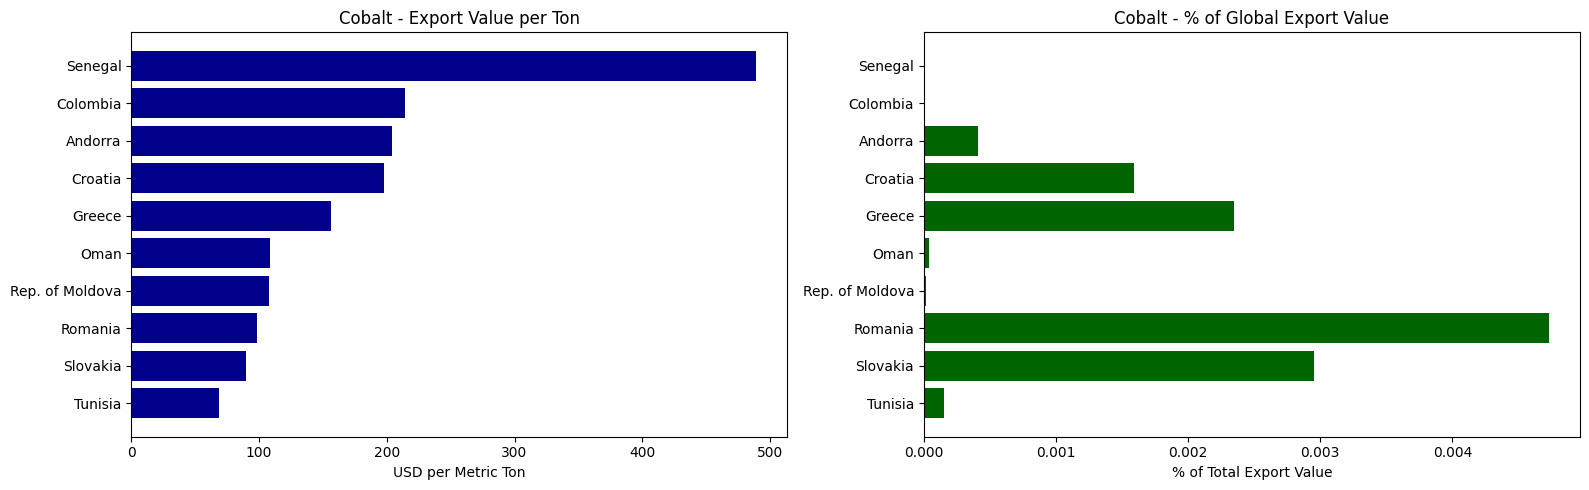


 Lithium - Top Exporters (USD per ton & % Global Value)


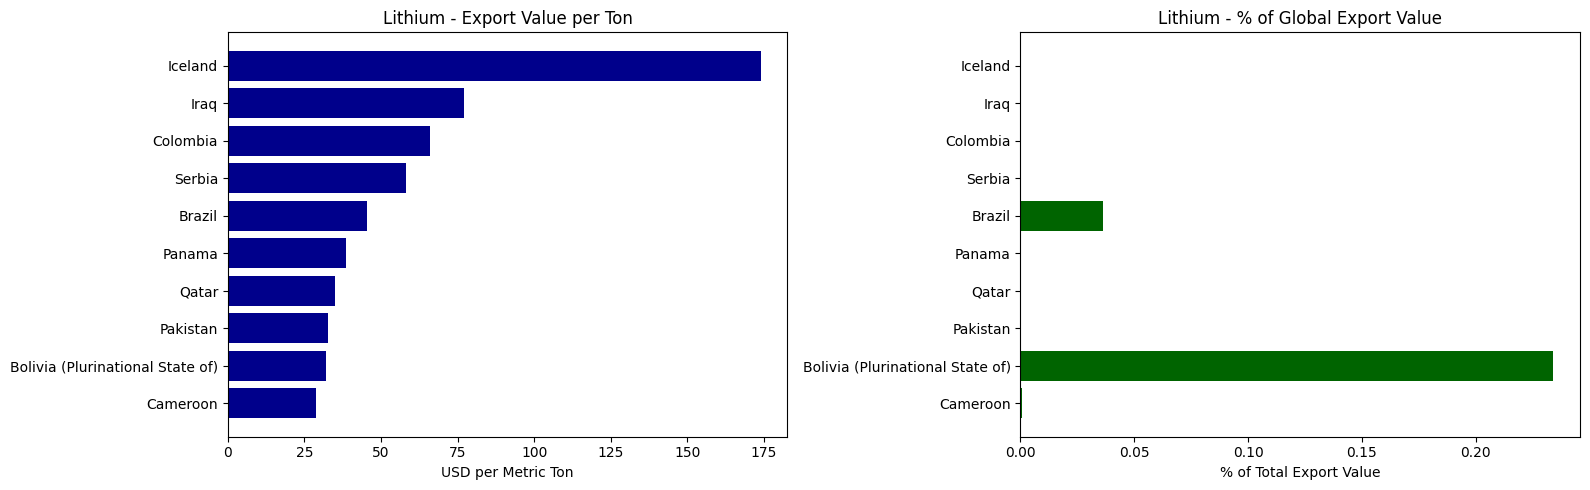


 Nickel - Top Exporters (USD per ton & % Global Value)


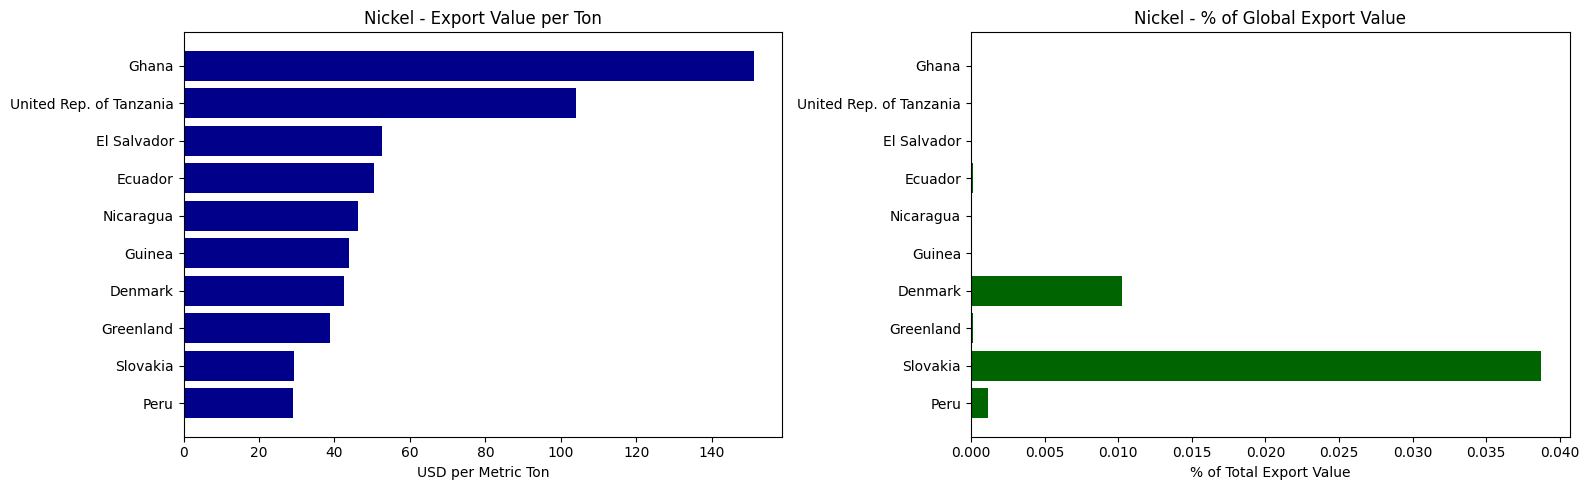


 Rare Earths (REEs) - Top Exporters (USD per ton & % Global Value)


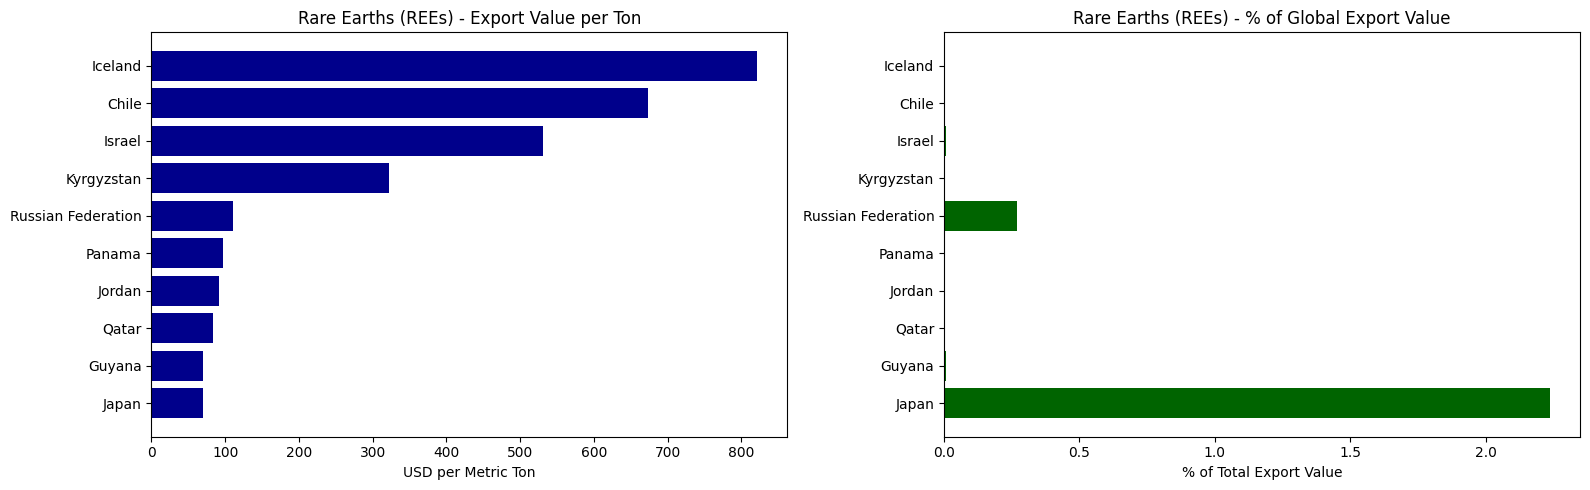


 Aluminum - Top Exporters (USD per ton & % Global Value)


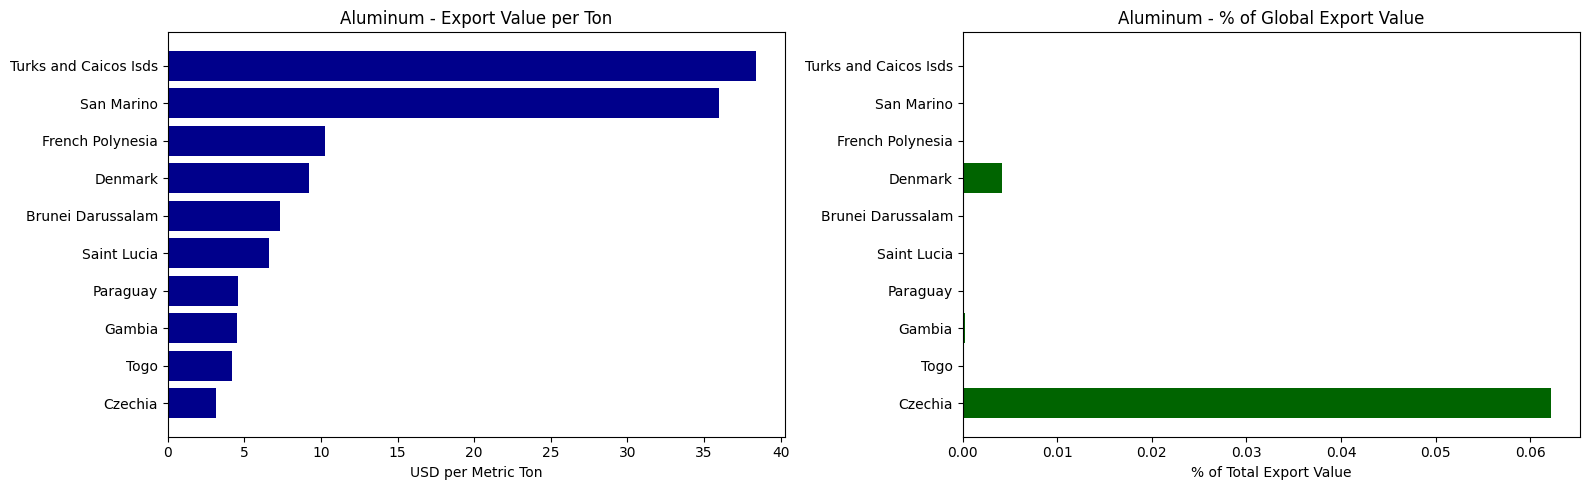

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

refining_df = dfs["Refining"]

print("=== Per-Metal Export Profitability and Share (Refining Only) ===")

for metal, hs_codes in metal_hs_map.items():
    metal_df = refining_df[refining_df["Product"].isin(hs_codes)]
    metal_df = metal_df[metal_df["Quantity"] > 0]  # avoid divide-by-zero

    if metal_df.empty:
        continue

    # Aggregate
    grouped = metal_df.groupby("Exporter_Name").agg({"Value": "sum", "Quantity": "sum"}).reset_index()
    grouped["USD_per_ton"] = grouped["Value"] / grouped["Quantity"]
    total_value = grouped["Value"].sum()
    grouped["%_Global_Export_Value"] = (grouped["Value"] / total_value) * 100

    top = grouped.sort_values("USD_per_ton", ascending=False).head(10)

    print(f"\n {metal} - Top Exporters (USD per ton & % Global Value)")

    # Plot
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

    ax1.barh(top["Exporter_Name"], top["USD_per_ton"], color="darkblue")
    ax1.set_title(f"{metal} - Export Value per Ton")
    ax1.set_xlabel("USD per Metric Ton")
    ax1.invert_yaxis()

    ax2.barh(top["Exporter_Name"], top["%_Global_Export_Value"], color="darkgreen")
    ax2.set_title(f"{metal} - % of Global Export Value")
    ax2.set_xlabel("% of Total Export Value")
    ax2.invert_yaxis()

    plt.tight_layout()
    plt.show()
